In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import urllib.request as urll

In [94]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
filename = 'InterpolacionNewtonNoequi.csv'
if not path.exists(filename):
    Path = urll.urlretrieve(url, filename)
else:
    print('--File found---')
    Path_ = filename

--File found---


In [95]:
Data = pd.read_csv(Path_,sep=",")

In [96]:
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [97]:
Diff = np.zeros((len(Y),len(Y)))
Diff[:,0] = Y

for i in range(1,len(X)):
    for j in range(i,len(Y)):
        Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]
Diff

array([[-18.,   0.,   0.,   0.,   0.,   0.],
       [-13.,   5.,   0.,   0.,   0.,   0.],
       [  0.,  13.,   8.,   0.,   0.,   0.],
       [  5.,   5.,  -8., -16.,   0.,   0.],
       [  3.,  -2.,  -7.,   1.,  17.,   0.],
       [ 10.,   7.,   9.,  16.,  15.,  -2.]])

In [98]:
def NewtonGregory(X,Y,x):
    
    Sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(Y)))
    Diff[:,0] = Y

    h = X[1] - X[0]
            
    poly = 1.0
    
    for i in range(1,len(X)):
        
        poly *= ( x - X[i-1] )
        
        for j in range(i, len(X)):
            
            Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]
            
        Sum_ += poly*(Diff[i,i])/(np.math.factorial(i)*h**(i))
    
    return Sum_,np.round(Diff,2)

In [99]:
x = np.linspace(np.min(X),np.max(X),100)
y,_ = NewtonGregory(X,Y,x)

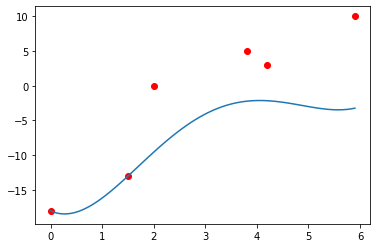

In [100]:
plt.scatter(X,Y,color='red')
plt.plot(x,y)

In [101]:
x = sym.Symbol('x',Real='True')
y,_ = NewtonGregory(X,Y,x)

In [102]:
y = y.simplify()

In [103]:
y

-0.00219478737997257*x**5 + 0.165157750342936*x**4 - 1.91458984910837*x**3 + 6.99914403292181*x**2 - 3.40385185185185*x - 18.0